In [79]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tqdm, tnrange

import aotools
from aotools.turbulence import infinitephasescreen_fried, phasescreen
import zernike

In [80]:
def plot_temporal_power_spectrum(x_vals, power_spectra, r0=None, L0=None):
    pyplot.figure()
    pyplot.grid()
    if L0 is not None:
        L0_cutoff = wind_speed/L0
        pyplot.text(L0_cutoff+0.2, 10e8, "V/L0")
        pyplot.plot([L0_cutoff, L0_cutoff], [10, 10e11], linestyle="--",linewidth=1, color="k")


    pyplot.loglog(x_vals, power_spectra.T, alpha=0.2)
    pyplot.loglog(x_vals, power_spectra.mean(0), color="blue")
    pyplot.plot(x_vals, 7e6 * x_vals**(-8./3), color="k", linestyle=":")
    pyplot.xlabel("Frequency (Hz)")
    pyplot.ylabel("Power ($\mathrm{rad}^2$)")

In [81]:
nx_size = 128
pxl_scale = 8./nx_size # m/pixel
r0 = 0.2
L0 = 10.
n_tests = 16
wind_speed = 10 #m/s - just arbitrarily set

In [88]:
n_scrns = 10000
stencil_length_factor = 16

time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

print("Time Step: {} s".format(time_step))


power_spectrum_inf = numpy.zeros((n_tests, n_scrns))

for n in tnrange(n_tests):
    print("Init phase screen")
    phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
    print("Total Stencil Size: {}m ({} pixels)".format(stencil_length_factor*phase_screen.nx_size * pxl_scale, phase_screen.stencil_length))

    print("alloc screen buffer")
    screen_buffer = numpy.zeros((n_scrns, nx_size**2))

    for i in tnrange(n_scrns):
        phase_screen.addRow()
        scrn = phase_screen.scrn
        if n%4 == 0:
            scrn = scrn
        elif n%4 == 1:
            scrn = scrn.T
        elif n%4 == 2:
            scrn = scrn[::-1]
        else:
            scrn = scrn[::-1].T
            
        screen_buffer[i] = scrn.flatten()

    print("Do FFT...")

    power_spectra = abs(numpy.fft.fft(screen_buffer, axis=0))**2
    power_spectrum_inf[n] = power_spectra.mean(1)


x_vals_inf = numpy.fft.fftfreq(n_scrns, d=time_step)
power_spectrum_inf = power_spectrum_inf[:, :n_scrns//2]
x_vals_inf = x_vals_inf[:n_scrns//2]


Time Step: 0.00625 s
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 129.0m (2064 pixels)
alloc screen buffer
Do FFT...
Init phase screen
New size: 129
Total Stencil Size: 

<IPython.core.display.Javascript object>


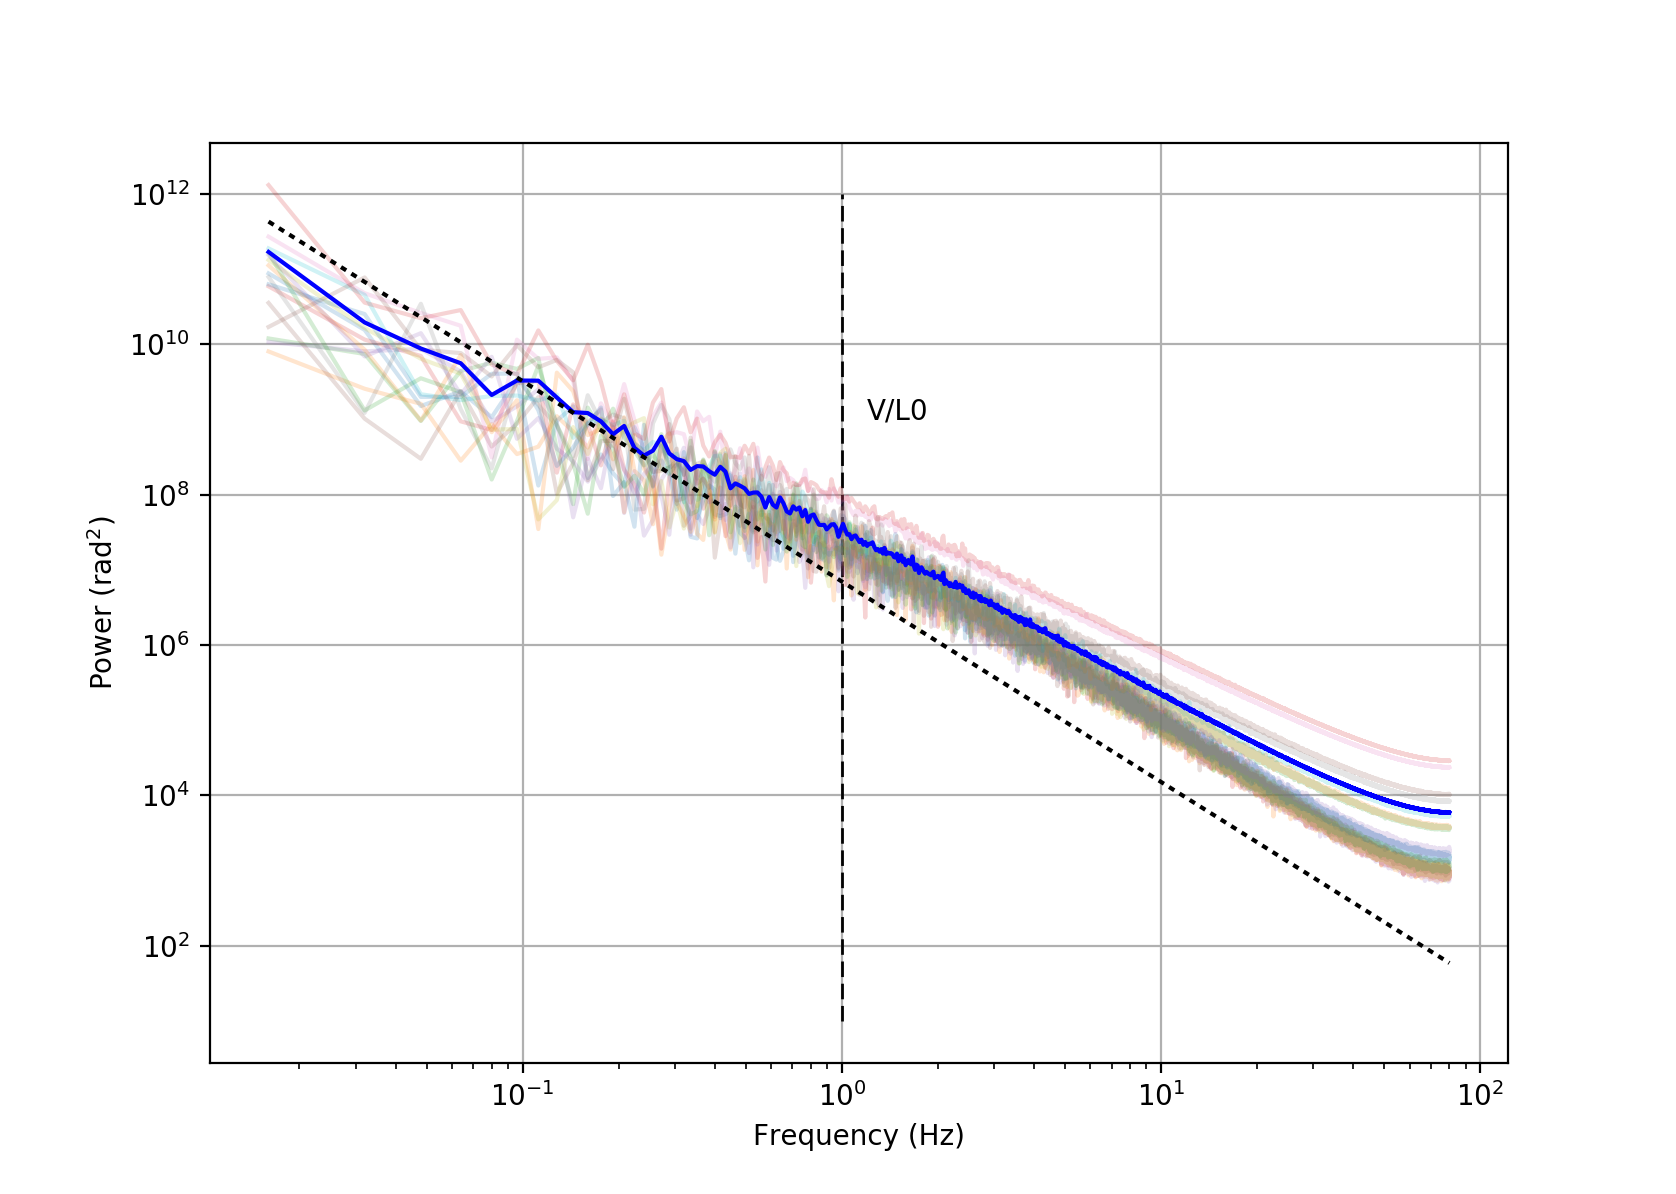

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in power


In [89]:
plot_temporal_power_spectrum(x_vals_inf, power_spectrum_inf, r0=r0, L0=L0)

In [90]:
screen_size_factor = 16

total_scrn_size = screen_size_factor * nx_size
time_step = pxl_scale/wind_speed # This is timestep, as one pixel moved on each iteration

n_scrns = total_scrn_size - nx_size

print("Time Step: {} s".format(time_step))

power_spectrum_fft = numpy.zeros((n_tests, n_scrns))

for n in tnrange(n_tests):
    print("alloc screen buffer")
    screen_buffer = numpy.zeros((n_scrns, nx_size**2))

    phase_screen = phasescreen.ft_phase_screen(r0, total_scrn_size, pxl_scale, L0, 0.01)[:, :nx_size]

    
    for i in tnrange(n_scrns):
        scrn = phase_screen[i:i+nx_size]
        if n%4 == 0:
            scrn = scrn
        elif n%4 == 1:
            scrn = scrn.T
        elif n%4 == 2:
            scrn = scrn[::-1]
        else:
            scrn = scrn[::-1].T
            
        screen_buffer[i] = scrn.flatten()

    print("Do FFT...")

    power_spectra = abs(numpy.fft.fft(screen_buffer, axis=0))**2
    power_spectrum_fft[n] = power_spectra.mean(1)


x_vals_fft = numpy.fft.fftfreq(n_scrns, d=time_step)
power_spectrum_fft = power_spectrum_fft[:, :n_scrns//2]
x_vals_fft = x_vals_fft[:n_scrns//2]

Time Step: 0.00625 s
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...



<IPython.core.display.Javascript object>


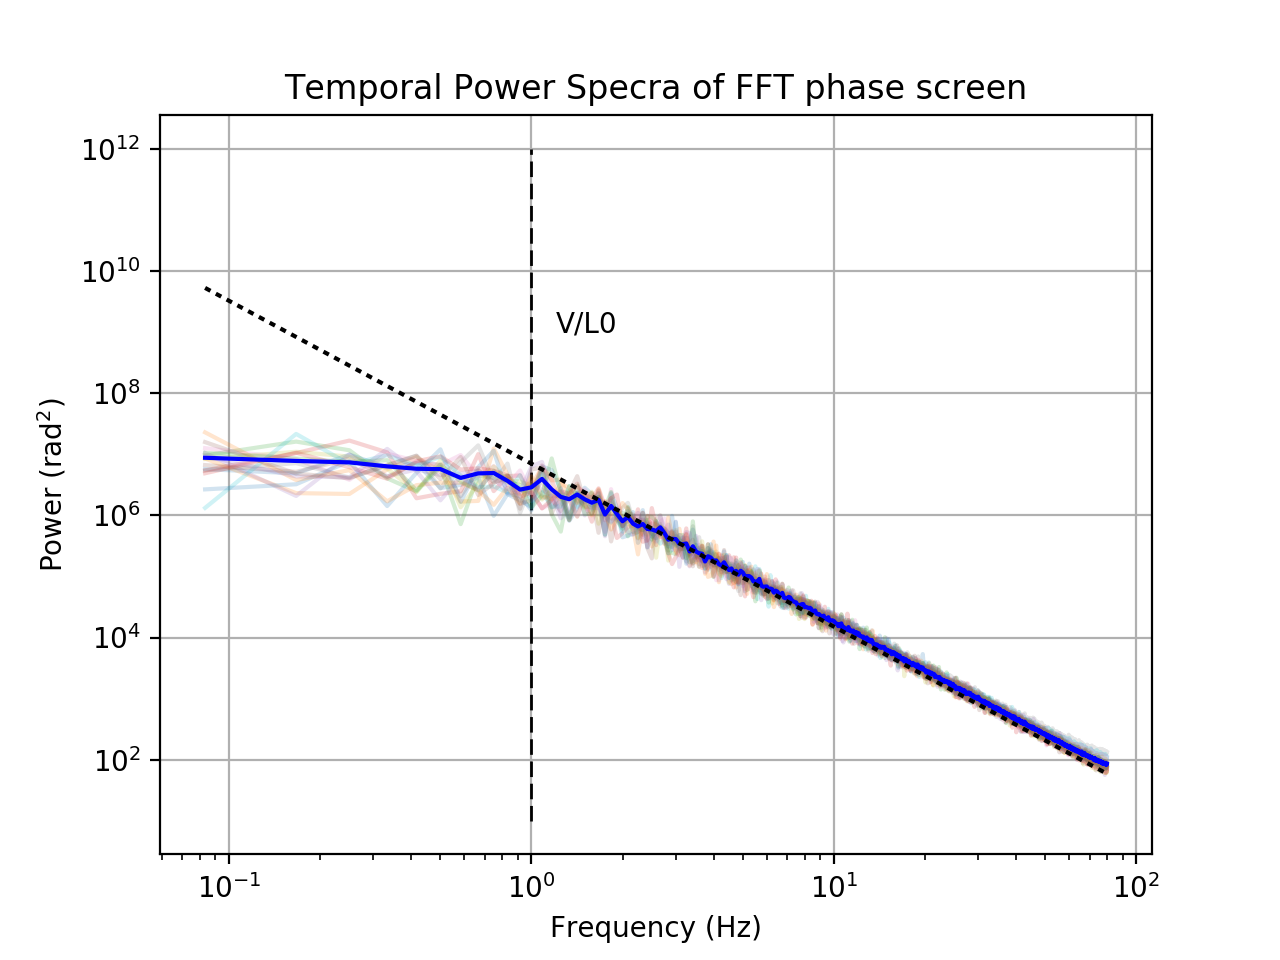

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in power


In [91]:
plot_temporal_power_spectrum(x_vals_fft, power_spectrum_fft, r0=r0, L0=L0)
pyplot.title("Temporal Power Specra of FFT phase screen")

<IPython.core.display.Javascript object>


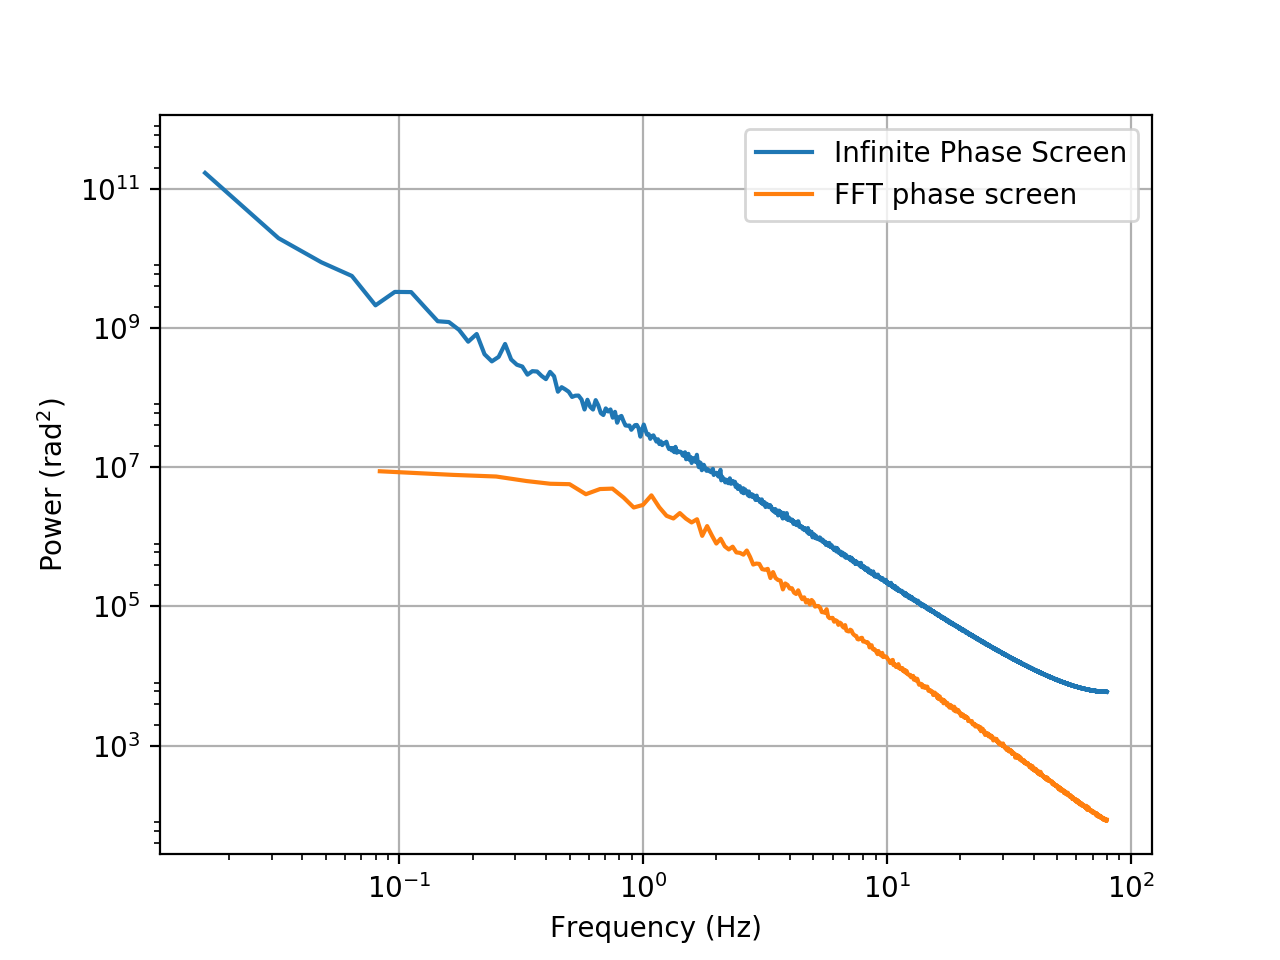

In [92]:
pyplot.figure()
pyplot.loglog(x_vals_inf, power_spectrum_inf.mean(0), label="Infinite Phase Screen")
pyplot.loglog(x_vals_fft, power_spectrum_fft.mean(0), label="FFT phase screen")

pyplot.legend()
pyplot.xlabel("Frequency (Hz)")
pyplot.ylabel("Power ($\mathrm{rad}^2$)")
pyplot.grid()